# Portfolio Optimization using Modern Portfolio Theory

This project analyzes a four-asset equity portfolio (AAPL, MSFT, GOOGL, AMZN)
using Modern Portfolio Theory (Markowitz framework). We compare an equal-weight
portfolio with optimized portfolios obtained through Monte Carlo simulation,
focusing on risk, return, and cumulative performance.

The objective is to illustrate how portfolio optimization techniques can
improve risk-adjusted returns relative to a naïve allocation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## Data Collection

We download daily closing prices from Yahoo Finance and compute
daily percentage returns for each asset. These returns form the basis
for portfolio risk and return calculations.

In [2]:
tickers=["AAPL","MSFT","GOOGL","AMZN"]
data=yf.download(tickers,start="2019-01-01")
prices=data["Close"]
returns=prices.pct_change().dropna()

[*********************100%***********************]  4 of 4 completed


In [3]:
weights = np.array([0.25,0.25,0.25,0.25])
portfolio_returns=returns.dot(weights)
mean_daily_returns=portfolio_returns.mean()
annual_return=mean_daily_returns*252
daily_risk=portfolio_returns.std()
annual_risk=daily_risk*np.sqrt(252)
sharpe_ratio=annual_return/annual_risk

In [4]:
cov_matrix=returns.cov()
def portfolio_risk(weights,cov_matrix):
    variance=weights.T@cov_matrix@weights
    daily_risk=np.sqrt(variance)
    annual_risk=daily_risk*np.sqrt(252)
    return annual_risk
mean_returns=returns.mean()*252
def portfolio_return(weights,mean_returns):
    return np.dot(weights,mean_returns)

## Monte Carlo Simulation

To approximate the Efficient Frontier, we generate a large number of
random portfolios. For each portfolio, we compute annual return and
annual volatility using the mean–covariance framework.

In [5]:
num_portfolios = 5000
portfolio_returns_list = []
portfolio_risks_list = []
portfolio_weights_list = []
np.random.seed(42)
for i in range(num_portfolios):
    weights=np.random.random(4)
    weights=weights/np.sum(weights)
    r=portfolio_return(weights,mean_returns)
    risk=portfolio_risk(weights,cov_matrix)
    portfolio_returns_list.append(r)
    portfolio_risks_list.append(risk)
    portfolio_weights_list.append(weights)

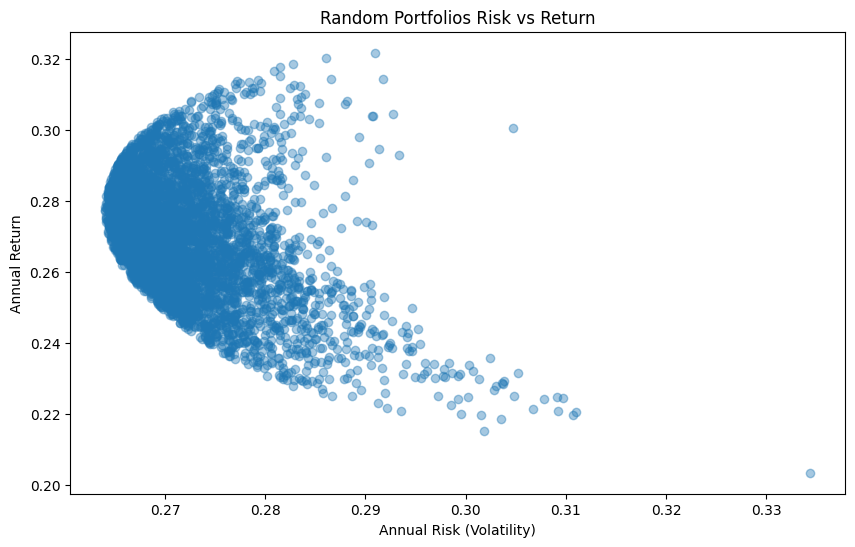

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(portfolio_risks_list,portfolio_returns_list,alpha=0.4)
plt.xlabel("Annual Risk (Volatility)")
plt.ylabel("Annual Return")
plt.title("Random Portfolios Risk vs Return")
plt.show()

## Optimal Portfolios

From the simulated portfolios, we identify:

- The Minimum Volatility portfolio  
- The Maximum Sharpe Ratio portfolio  

These portfolios represent two different optimization objectives:
risk minimization and risk-adjusted return maximization.

In [7]:
sharpe_list=np.array(portfolio_returns_list)/np.array(portfolio_risks_list)
best_idx=np.argmax(sharpe_list)
best_sharpe=sharpe_list[best_idx]
best_return=portfolio_returns_list[best_idx]
best_risk=portfolio_risks_list[best_idx]
best_weights=portfolio_weights_list[best_idx]

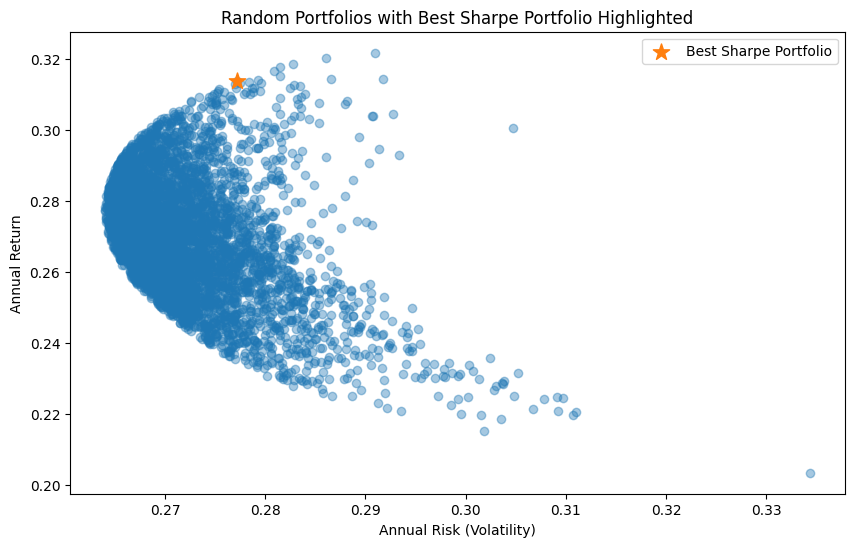

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(portfolio_risks_list,portfolio_returns_list,alpha=0.4)
plt.scatter(best_risk,best_return,s=150,marker="*",label="Best Sharpe Portfolio")
plt.xlabel("Annual Risk (Volatility)")
plt.ylabel("Annual Return")
plt.title("Random Portfolios with Best Sharpe Portfolio Highlighted")
plt.legend()
plt.show()

In [9]:
minvol_idx=np.argmin(portfolio_risks_list)
minvol_risk=portfolio_risks_list[minvol_idx]
minvol_return=portfolio_returns_list[minvol_idx]
minvol_weights=portfolio_weights_list[minvol_idx]

In [10]:
equal_weights=np.array([0.25,0.25,0.25,0.25])
equal_return=portfolio_return(equal_weights,mean_returns)
equal_risk=portfolio_risk(equal_weights,cov_matrix)
equal_sharpe=equal_return/equal_risk
equal_return,equal_risk,equal_sharpe

(np.float64(0.269794638995933),
 np.float64(0.26693557323271566),
 np.float64(1.01071069595031))

In [11]:
minvol_sharpe=minvol_return/minvol_risk
best_sharpe_check=best_return/best_risk
summary=pd.DataFrame(
    {
    "Annual Return":[equal_return,minvol_return,best_return],
    "Annual Risk":[equal_risk,minvol_risk,best_risk],
    "Sharpe (Rf=0)":[equal_sharpe,minvol_sharpe,best_sharpe_check]
    }, 
    index=pd.Index(["Equal Weight","Min-volatility","Best-Sharpe"],
    name="Portfolio")
)
summary

,Annual Return,Annual Risk,Sharpe (Rf=0)
Portfolio,,,
Equal Weight,0.269795,0.266936,1.010711
Min-volatility,0.277413,0.264034,1.050672
Best-Sharpe,0.313797,0.277216,1.131959


## Cumulative Portfolio Performance

To evaluate practical investment impact, we simulate a EUR 10,000
initial investment and track the cumulative value of each portfolio
over time.

In [12]:
equal_daily=returns.dot(equal_weights)
minvol_daily=returns.dot(minvol_weights)
best_daily=returns.dot(best_weights)

initial_investment=10_000
equal_value=(1+equal_daily).cumprod()*initial_investment
minvol_value=(1+minvol_daily).cumprod()*initial_investment
best_value=(1+best_daily).cumprod()*initial_investment
equal_value.iloc[-1],minvol_value.iloc[-1],best_value.iloc[-1]

(np.float64(52534.59094477096),
 np.float64(55749.388139216266),
 np.float64(70332.62466735345))

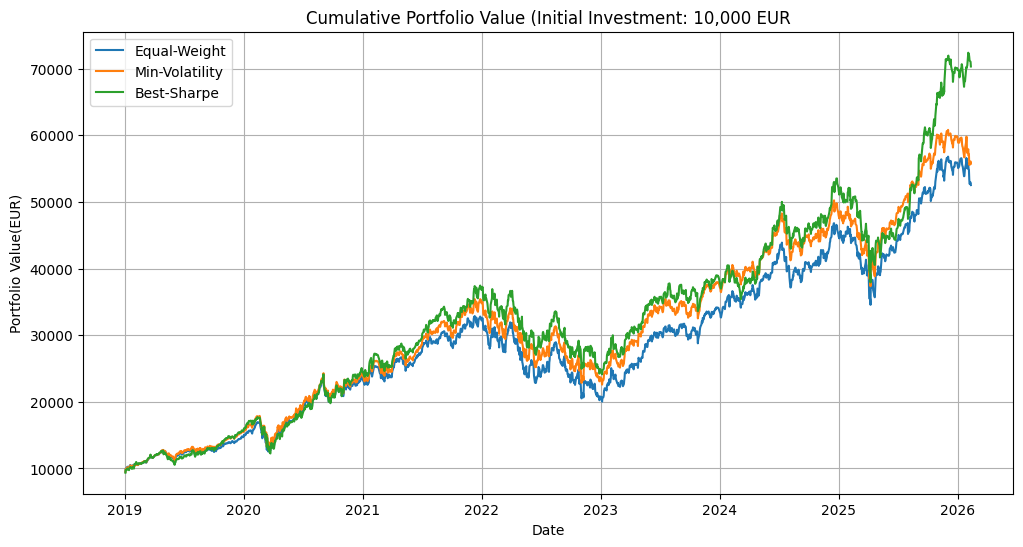

In [13]:
plt.figure(figsize=(12,6))
plt.plot(equal_value,label="Equal-Weight")
plt.plot(minvol_value,label="Min-Volatility")
plt.plot(best_value,label="Best-Sharpe")
plt.title("Cumulative Portfolio Value (Initial Investment: 10,000 EUR")
plt.xlabel("Date")
plt.ylabel("Portfolio Value(EUR)")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print("Equal Weight Portfolio final value is",equal_value.iloc[-1])
print("Minimum Volatility Portfolio final value is",minvol_value.iloc[-1])
print("Best Sharpe Portfolio final value is",best_value.iloc[-1])

Equal Weight Portfolio final value is 52534.59094477096
Minimum Volatility Portfolio final value is 55749.388139216266
Best Sharpe Portfolio final value is 70332.62466735345


## Conclusion

This analysis demonstrates how portfolio optimization techniques
can significantly influence both risk and return characteristics.

While the Minimum Volatility portfolio provides smoother performance,
the Maximum Sharpe portfolio achieves superior risk-adjusted returns
relative to an equal-weight benchmark.

Note: Prices are based on daily closing values. Using adjusted closing
prices would account for dividends and splits, but does not materially
affect the comparative results presented here.
